In [ ]:
!pip install dowhy

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Arctic_domain_mean_1979_2021.csv')
df = df.drop('Date', axis=1)
df.head()

,wind_10m,specific_humidity,LW_down,SW_down,rainfall,snowfall,sst,t2m,surface_pressure,sea_ice_extent
0,5.872050,0.786595,184.999071,1.417925,1.089897,1.031549,273.379711,250.401819,979.401142,14997215.0
1,6.155597,0.756973,182.686318,1.368594,0.923499,0.837877,273.376830,250.364683,979.340886,14997215.0
2,5.691054,0.777598,186.387764,1.197913,1.218984,1.066028,273.385489,250.452749,983.409060,14997215.0
3,5.628824,0.819629,191.888081,1.405106,1.783778,1.448627,273.396461,250.290579,983.557055,14922219.0
4,6.255928,0.869896,190.541890,1.305893,0.995828,0.776768,273.404602,250.895886,978.020927,14922219.0


In [ ]:
print(df.columns)

from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

Index(['wind_10m', 'specific_humidity', 'LW_down', 'SW_down', 'rainfall',
       'snowfall', 'sst', 't2m', 'surface_pressure', 'sea_ice_extent'],
      dtype='object')


In [ ]:
!pip install causal-learn==0.1.2.4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 169 kB 24.2 MB/s 


Starting Fast Adjacency Search.


  0%|          | 0/10 [00:00<?, ?it/s]

Finishing Fast Adjacency Search.
X1 --> X9
X2 --> X3
X7 --> X5
X7 --> X10


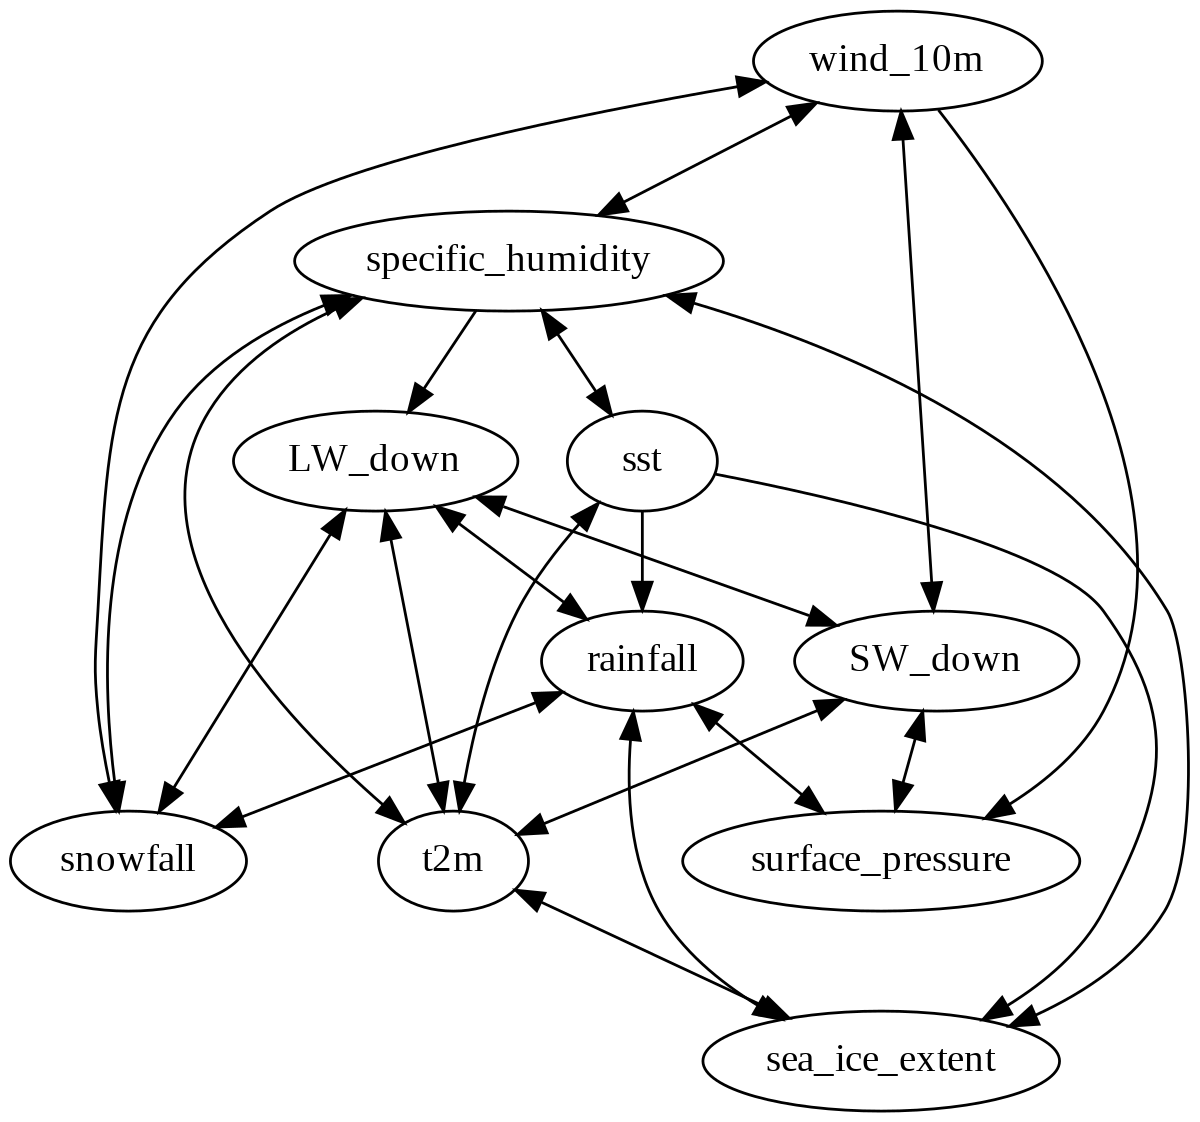

In [ ]:
from causallearn.search.ConstraintBased.FCI import fci
G = fci(df.to_numpy())

# visualization
from causallearn.utils.GraphUtils import GraphUtils
dot = GraphUtils.to_pydot(G[0], labels=df.columns)

view_pydot(dot)

  0%|          | 0/10 [00:00<?, ?it/s]

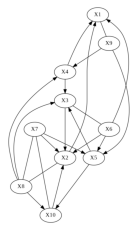

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
cg = pc(df.to_numpy())

# visualization using pydot
cg.draw_pydot_graph()

x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1 -1  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
[[ 0  0  0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1 -1  0]
 [ 0  0  0  0  0 

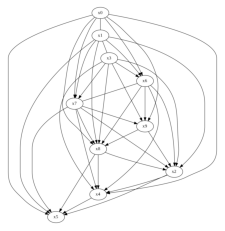

In [ ]:
from causallearn.search.ScoreBased.GES import ges

Record = ges(df.to_numpy())

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')